In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('telecom_churn.csv')
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [23]:
# Explorer les colonnes de notre dataset
data.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [24]:
print(data['Churn']) 

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64


In [25]:
data.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [26]:
data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [27]:
data['AccountWeeks'].describe()

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: AccountWeeks, dtype: float64

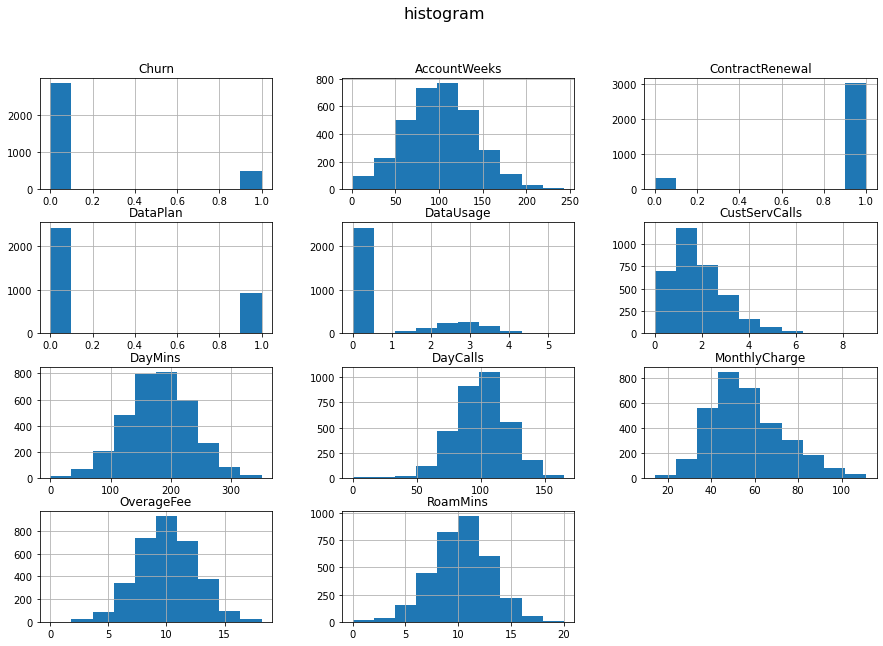

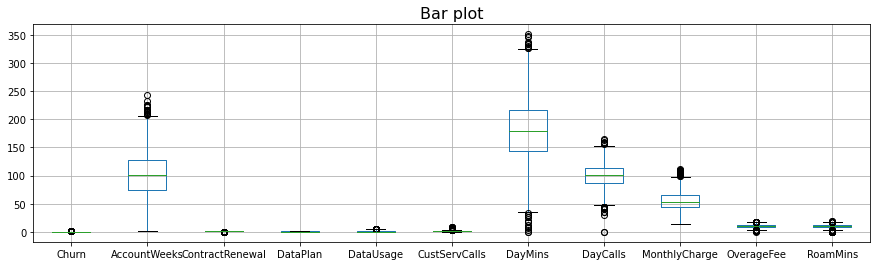

In [17]:
#histogramms
data.hist(figsize=(15,10))
plt.suptitle("histogram", fontsize=16)
plt.show()
#boxplot
data.boxplot(figsize=(15,4))
plt.title("Bar plot", fontsize=16)
plt.show()

                    Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
Churn            1.000000      0.016541        -0.259852 -0.102148  -0.087195   
AccountWeeks     0.016541      1.000000        -0.024735  0.002918   0.014391   
ContractRenewal -0.259852     -0.024735         1.000000 -0.006006  -0.019223   
DataPlan        -0.102148      0.002918        -0.006006  1.000000   0.945982   
DataUsage       -0.087195      0.014391        -0.019223  0.945982   1.000000   
CustServCalls    0.208750     -0.003796         0.024522 -0.017824  -0.021723   
DayMins          0.205151      0.006216        -0.049396 -0.001684   0.003176   
DayCalls         0.018459      0.038470        -0.003755 -0.011086  -0.007962   
MonthlyCharge    0.072313      0.012581        -0.047291  0.737490   0.781660   
OverageFee       0.092812     -0.006749        -0.019105  0.021526   0.019637   
RoamMins         0.068239      0.009514        -0.045871 -0.001318   0.162746   

                 CustServCa

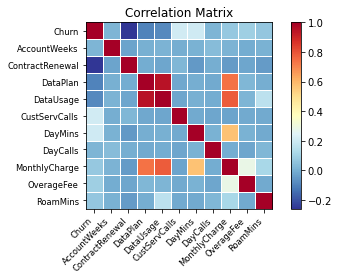

In [18]:
#correlation matirx
corr = data.corr() 
print(corr)
import statsmodels.api as sm
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show() 

La mattrice affiche l’état de corrélation entre les attributs du Customer_churn dataset avec la classe Churn. On remarque que la corrélation entre les attributs et species est faible (<0.4 en valeur absolue), ce qui nous indique que ces attributs determinent faiblement la classe Churm.

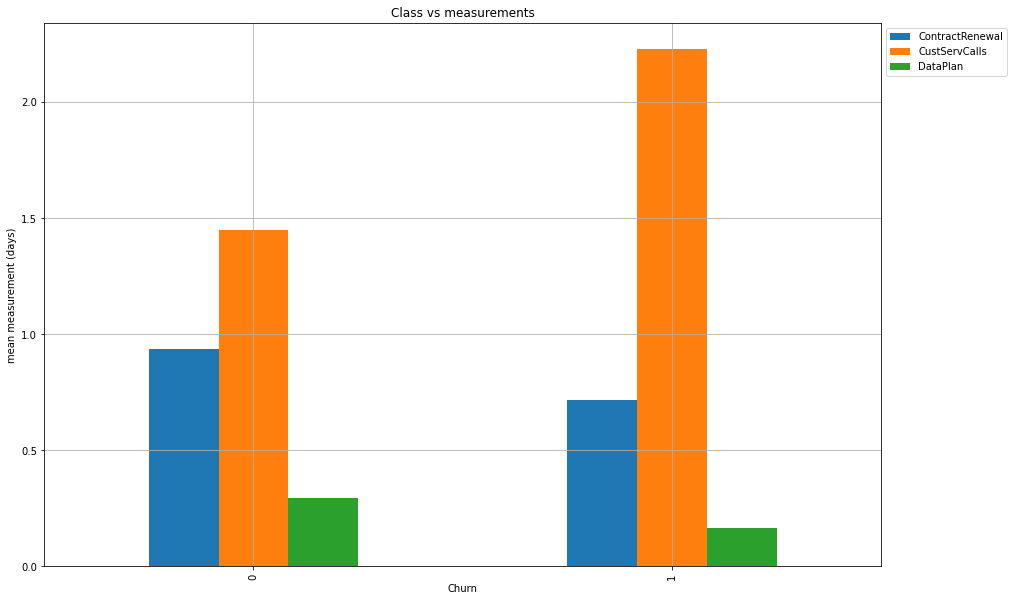

In [19]:
data2 =pd.DataFrame(data, columns={"ContractRenewal", "DataPlan", "CustServCalls","Churn"})
data2.groupby(by = "Churn").mean().plot(kind="bar", figsize=(15,10))
#data.groupby(by="ContractRenewal").mean()
plt.title('Class vs measurements')
plt.ylabel('mean measurement (days)')
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1,1)) 

Partie III : Design expérimental de la classification : exemple de K-nn

In [20]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split 
X=data.drop(columns="Churn")
y=data.Churn
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X,y)
y_model = model.predict(X)
accuracy_score(y,y_model) 

1.0

On a fait le test sur la meme dataset cela donne alors un resultat 100% correct puisque le modele connait deja les donnees traites

In [44]:
#Hold out

X =pd.DataFrame(data, columns={"ContractRenewal", "DayMins", "CustServCalls"})
y=data.Churn
model2 = KNeighborsClassifier(n_neighbors=5)
X1, X2, y1, y2 = train_test_split(X,y, random_state= np.random, train_size=0.7)
y_pred=model.fit(X1,y1).predict(X2)
y2_model=model.predict(X2)
print(accuracy_score(y2,y2_model)) 

0.838


En exécutant le code plusieurs fois, on obtient des valeurs différentes. Cela est du à la fonction random qui donne à chaque fois des valeurs différentes donc les données s’organisent différement.

In [29]:
#2 fold
X1, X2, y1, y2 = train_test_split(X,y, random_state= 0, train_size=0.5)
y2_model = model.fit(X1,y1).predict(X2)
y1_model = model.fit(X2,y2).predict(X1)
accuracy_score(y1,y1_model), accuracy_score(y2, y2_model) 

(0.8373349339735895, 0.8332333533293341)

In [30]:
#5 fold
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5) 

array([0.81709145, 0.83958021, 0.84107946, 0.81831832, 0.83483483])

In [31]:
#lOOCV
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv =LeaveOneOut())
scores.mean() 
print(scores)
print(scores.mean()) 
 

[1. 1. 1. ... 1. 1. 0.]
0.8325832583258326


Les valeurs ne changent pas même si on exécute le code multiple fois. Les valeurs du 0 et 1 dans notre array correspondent à chaque élément dans nos données de validation. La valeur 0.0.8127812781278128 est la moyenne du résultat obtenu dans LOOCV, c’est l’accuracy de notre model.

In [32]:
X1, X2, y1, y2 = train_test_split(X,y, random_state= np.random, train_size=0.7)
y_pred=model2.fit(X1,y1).predict(X2)
y2_model=model2.predict(X2)
cm1= confusion_matrix(y2, y2_model)
print("Confusion Matrix: \n", cm1)
print(accuracy_score(y2, y2_model))
print(precision_score(y2, y2_model, average='weighted'))
print(recall_score(y2, y2_model, average='macro'))
print("Accuracy:", accuracy_score(y2, y2_model))
print("Confusion matrix:", confusion_matrix(y2, y2_model))
print("Classification report :", classification_report(y2, y2_model))

Confusion Matrix: 
 [[833  23]
 [ 98  46]]
0.879
0.8618947368421053
0.6462876427829698
Accuracy: 0.879
Confusion matrix: [[833  23]
 [ 98  46]]
Classification report :               precision    recall  f1-score   support

           0       0.89      0.97      0.93       856
           1       0.67      0.32      0.43       144

    accuracy                           0.88      1000
   macro avg       0.78      0.65      0.68      1000
weighted avg       0.86      0.88      0.86      1000



In [33]:
from sklearn.model_selection import cross_val_score 
from sklearn.datasets import load_iris
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
# HoLdout (70%-30%) 
X=data.drop(columns="Churn")
y=data.Churn
model = KNeighborsClassifier(n_neighbors=5) 
Xl, X2, yl, y2 = train_test_split(X, y, random_state= np.random,train_size=0.7) 
y_pred=model.fit(Xl, yl).predict(X2) 
y2_model = model.predict(X2) 
print('\n') 
print ('accuracy', accuracy_score(y2, y2_model)) 
print ('precision', precision_score(y2, y2_model,average='weighted'))
print ('recall', recall_score(y2, y2_model,average='macro'))
print('F1 score', f1_score(y2, y2_model, average='macro')) 
print('\n') 



accuracy 0.873
precision 0.8561869189633896
recall 0.636233862959285
F1 score 0.6717591384065069




In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris 
from sklearn.model_selection import cross_val_predict 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
# 5 FoLd cross vaLidation 
X=data.drop(columns="Churn")
y=data.Churn
model = KNeighborsClassifier(n_neighbors=5) 
y_pred=cross_val_predict(model,X,y, cv=5) 
# print ("Confusion matrix :",confusion matrix(y, y_pred)) 
print('\n') 
print("accuracy : ",accuracy_score(y, y_pred)) 
print ("precision : ",precision_score(y, y_pred, average='macro')) 
print ("recall : ",recall_score(y, y_pred, average='macro')) 
print ("f1-score : ",f1_score(y, y_pred, average='macro')) 
print('\n') 



accuracy :  0.8712871287128713
precision :  0.7557902345004819
recall :  0.6272605426610003
f1-score :  0.658907263353983




In [35]:
from sklearn.model_selection import LeaveOneOut 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.model_selection import cross_val_score 
# LOOCV
X=data.drop(columns="Churn")
y=data.Churn
model = KNeighborsClassifier(n_neighbors=5) 
y_pred=cross_val_predict(model,X,y, cv=LeaveOneOut()) 
print('\n') 
print("accuracy : ",accuracy_score(y, y_pred)) 
print ("precision : ",precision_score(y, y_pred, average='macro')) 
print ("recall : ",recall_score(y, y_pred, average='macro' ))
print ("f1-score : ",f1_score(y, y_pred, average='macro')) 
print('\n') 



accuracy :  0.8754875487548754
precision :  0.7771996795837073
recall :  0.6297166830118776
f1-score :  0.6641224840359259




In [36]:
#Grid search
from sklearn.model_selection import GridSearchCV
#creat a new KNN model
Knn2 = KNeighborsClassifier()
K_range = list(range(1,31))
pram_grid = dict(n_neighbors = K_range)
grid = GridSearchCV(Knn2, pram_grid, cv = 5, scoring = 'accuracy')
grid.fit(X,y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8763933348640995
{'n_neighbors': 4}
KNeighborsClassifier(n_neighbors=4)


le paramètre optimal en utilisant 5 FoLd cross vaLidation est k = 4

In [37]:
from sklearn import tree 
from sklearn.metrics import accuracy_score 
X=data.drop(columns="Churn")
y=data.Churn
model = tree.DecisionTreeClassifier() 
model = model.fit(X, y) 
y_model=model.predict(X) 
accuracy_score(y,y_model) 

1.0

2- Évaluer le modèle arbre de décision selon le Tableau 2

Holdout 70% 30%

In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris 
from sklearn import tree 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import * 
from sklearn.model_selection import cross_val_predict 
from sklearn.model_selection import cross_val_score 
X=data.drop(columns="Churn")
y=data.Churn
# HoLdout 70% 30% 
Xl, X2, yl, y2 = train_test_split(X, y, random_state= np.random,train_size=0.7) 
model = tree.DecisionTreeClassifier() 
model = model.fit(X, y) 
y_pred=model.fit(Xl, yl).predict(X2) 
y2_model = model.predict(X2) 
cml = confusion_matrix(y2, y2_model) 
print ('accuracy', accuracy_score(y2, y2_model)) 
print ('precision', precision_score(y2, y2_model,average='weighted')) 
print ('recall', recall_score(y2, y2_model,average='macro')) 
print('f1-score', f1_score(y2, y2_model, average='macro')) 

accuracy 0.894
precision 0.8917302325581395
recall 0.7786765638878315
f1-score 0.7850142782969887


5 Folds Cross Validation

In [39]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris 
from sklearn import tree 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import * 
from sklearn.model_selection import cross_val_predict 
X=data.drop(columns="Churn")
y=data.Churn
Xl, X2, yl, y2 = train_test_split(X, y, random_state= np.random,train_size=0.7) 
model = tree.DecisionTreeClassifier() 
model = model.fit(X, y) 
y_pred=cross_val_predict(model,X,y, cv=5) 
# 5 FoLd cross vaLidation 
print("accuracy : ",accuracy_score(y, y_pred)) 
print ("precision : ",precision_score(y, y_pred, average='macro')) 
print ("recall : ",recall_score(y, y_pred, average='macro'))
print ("f1-score : ",f1_score(y, y_pred, average='macro')) 

accuracy :  0.891989198919892
precision :  0.7814658210007047
recall :  0.7872441974501472
f1-score :  0.7843053506251456


les paramètres optimaux du modèle en utilisant 5-folds-cross-validation 

In [40]:
from sklearn.model_selection import GridSearchCV 
# fold cross vaLidation 
model = tree.DecisionTreeClassifier() 
param_grid = {'max_leaf_nodes': list(range(3,100)),'min_samples_split': [2,3,4]}
grid = GridSearchCV(model, param_grid, cv=5, scoring = 'accuracy') 
grid.fit(X,y) 
print(grid.best_score_) 
print(grid.best_params_) 
print(grid.best_estimator_) 

0.9279941110525819
{'max_leaf_nodes': 33, 'min_samples_split': 2}
DecisionTreeClassifier(max_leaf_nodes=33)


 visualiser l’arbre

[Text(4366.309412643542, 3739.5931034482755, 'X[5] <= 264.45\ngini = 0.248\nsamples = 3333\nvalue = [2850, 483]'),
 Text(3363.5074871869815, 3608.3793103448274, 'X[4] <= 3.5\ngini = 0.202\nsamples = 3122\nvalue = [2766, 356]'),
 Text(2073.2151786640547, 3477.1655172413793, 'X[1] <= 0.5\ngini = 0.147\nsamples = 2871\nvalue = [2642, 229]'),
 Text(838.3893003064352, 3345.951724137931, 'X[9] <= 13.1\ngini = 0.47\nsamples = 267\nvalue = [166, 101]'),
 Text(815.5905260469867, 3214.7379310344827, 'X[5] <= 236.65\ngini = 0.367\nsamples = 219\nvalue = [166, 53]'),
 Text(599.5365168539327, 3083.5241379310346, 'X[6] <= 48.0\ngini = 0.329\nsamples = 188\nvalue = [149, 39]'),
 Text(576.7377425944842, 2952.310344827586, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(622.335291113381, 2952.310344827586, 'X[8] <= 13.835\ngini = 0.319\nsamples = 186\nvalue = [149, 37]'),
 Text(361.2180796731359, 2821.096551724138, 'X[0] <= 207.0\ngini = 0.288\nsamples = 166\nvalue = [137, 29]'),
 Text(338.4193054136

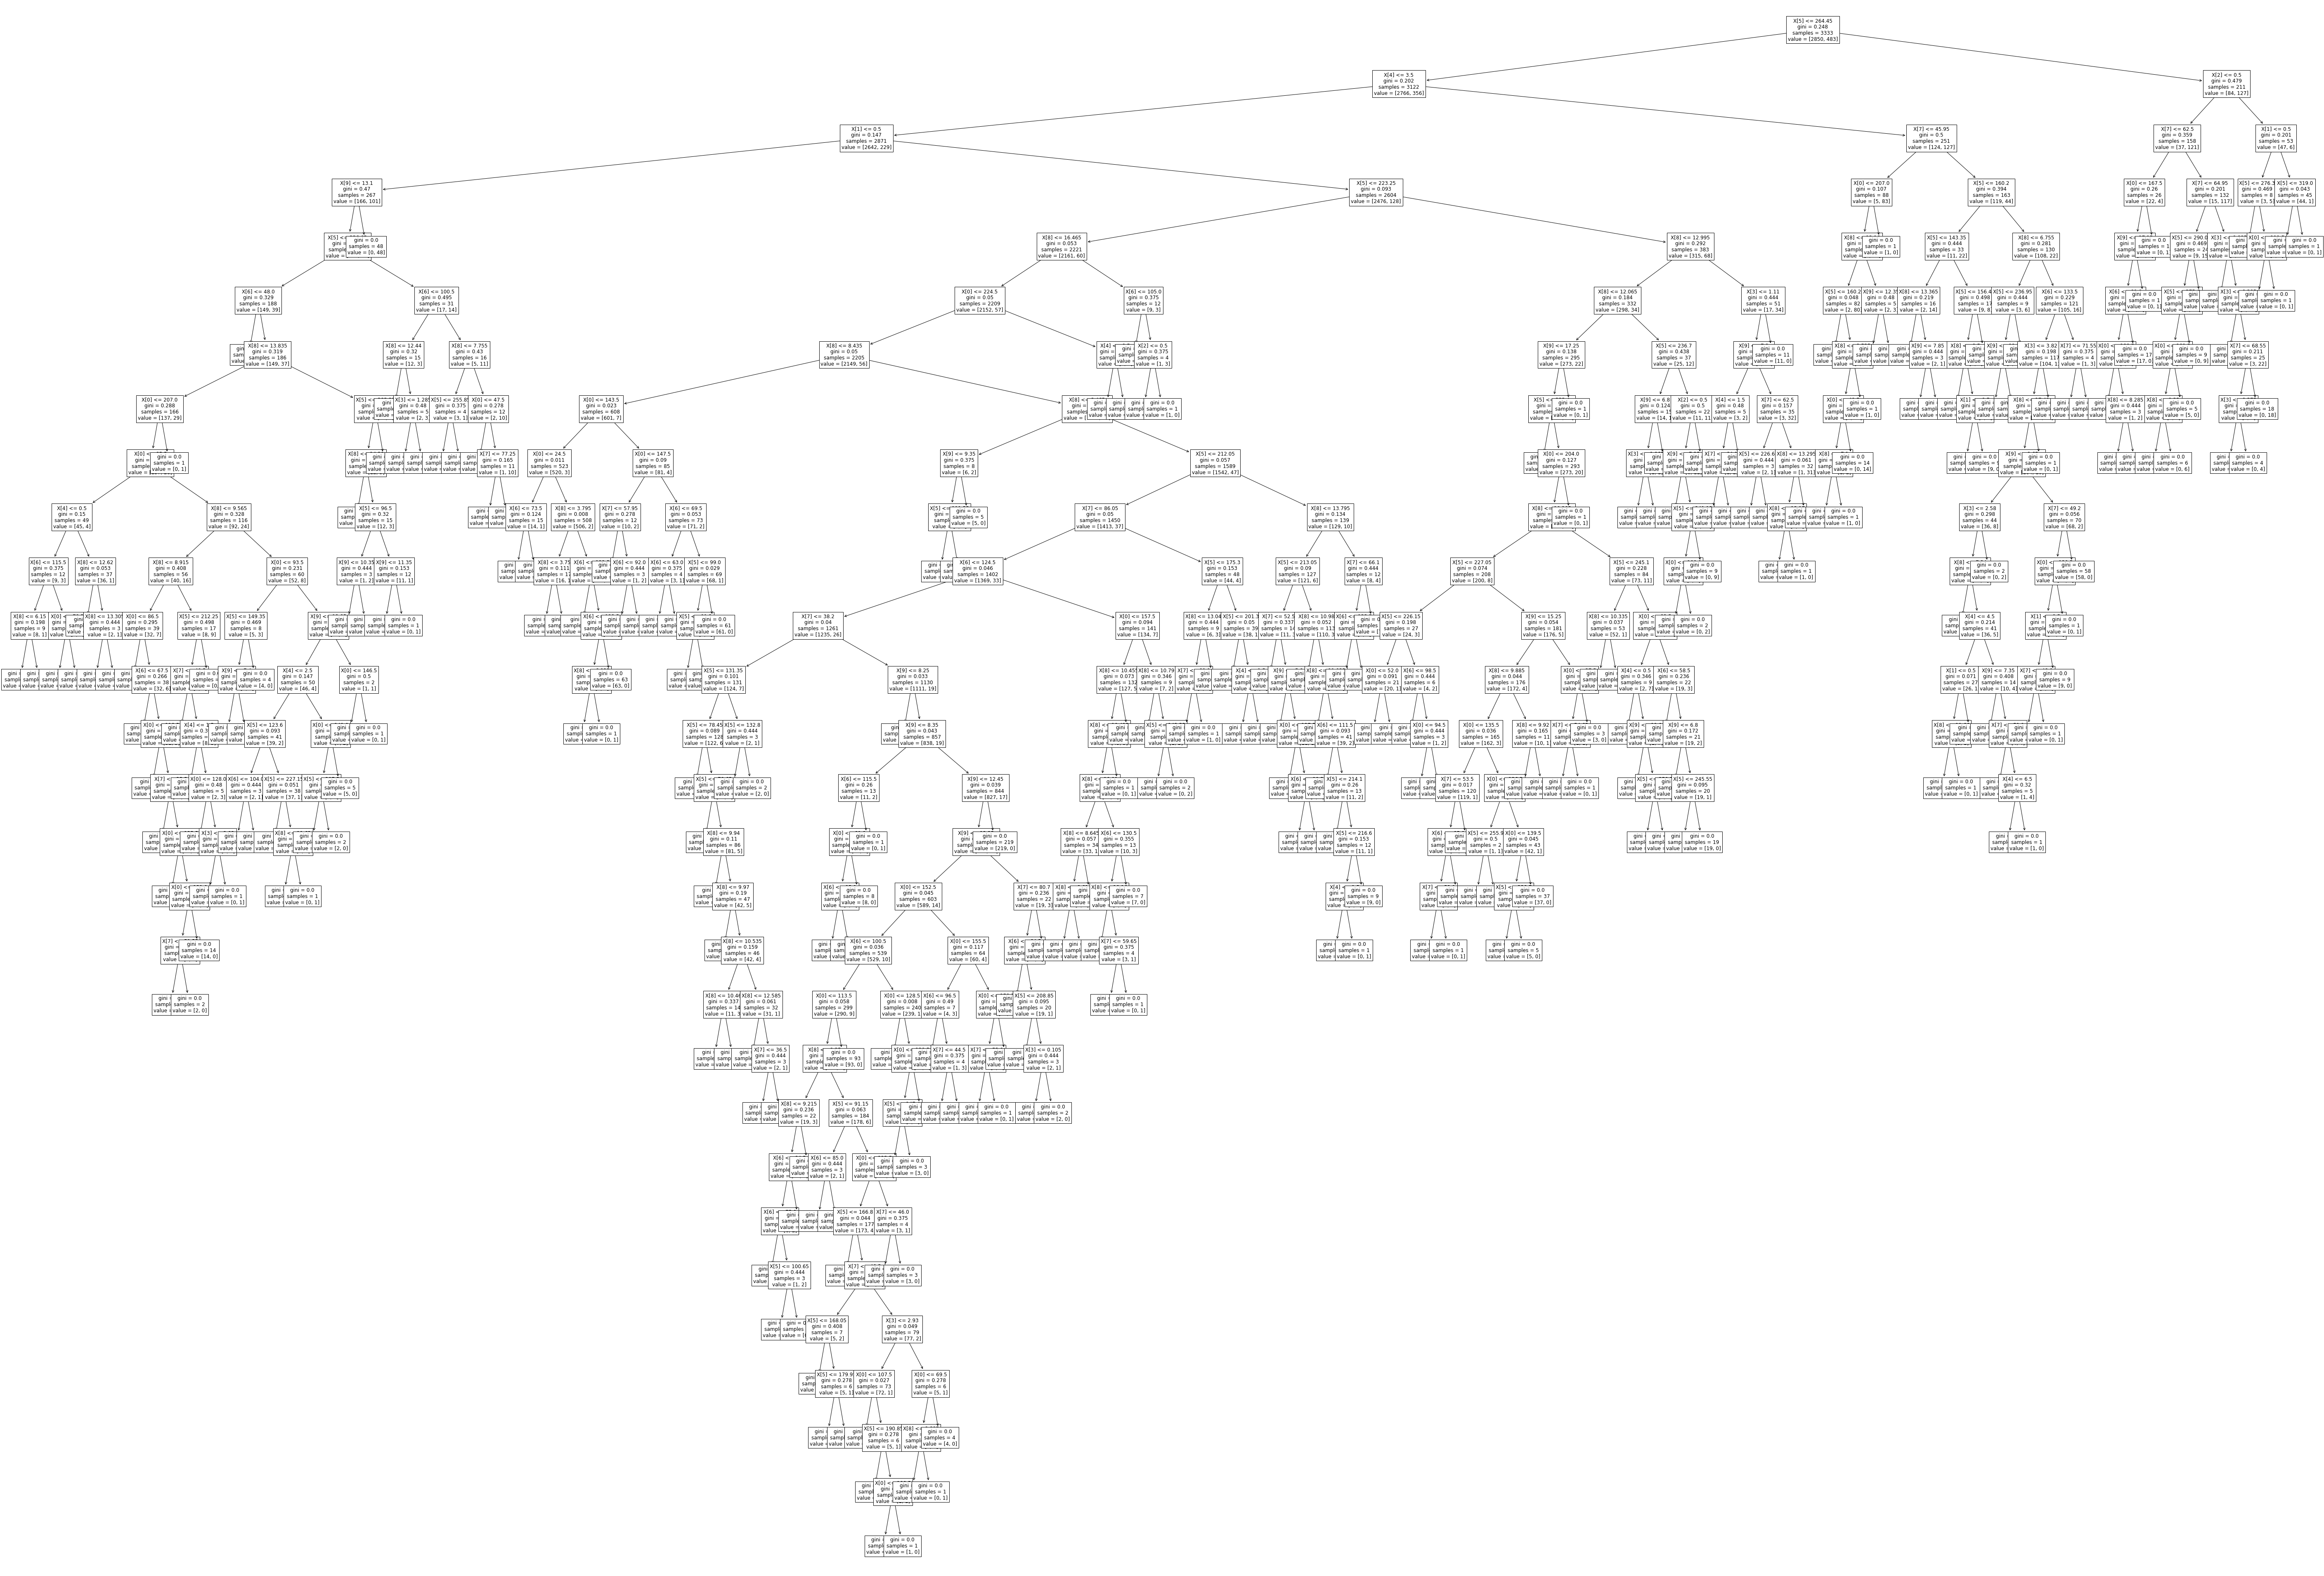

In [41]:
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris 
from sklearn import tree 
X=data.drop(columns="Churn")
y=data.Churn 
model = tree.DecisionTreeClassifier() 
model = model.fit(X, y) 
plt.figure(figsize=(100,70)) 
tree.plot_tree(model, fontsize= 12) 

In [42]:
from sklearn.model_selection import GridSearchCV 
# fold cross vaLidation 
model = tree.DecisionTreeClassifier() 
param_grid = {'max_leaf_nodes': list(range(3,100)),'min_samples_split': [2,3,4]} 
grid = GridSearchCV(model, param_grid, cv=5, scoring = 'accuracy') 
grid.fit(X,y) 
print(grid.best_score_)
print(grid.best_params_) 
print(grid.best_estimator_) 

0.9276933605269436
{'max_leaf_nodes': 34, 'min_samples_split': 4}
DecisionTreeClassifier(max_leaf_nodes=34, min_samples_split=4)
